Convolutional Networks

So far we have worked with deep fully-connected networks, using them to explore different optimization strategies and network architectures. Fully-connected networks are a good testbed for experimentation because they are very computationally efficient, but in practice all state-of-the-art results use convolutional networks instead.

First you will implement several layer types that are used in convolutional networks. You will then use these layers to train a convolutional network on the CIFAR-10 dataset.


In [1]:
# As usual, a bit of setup
from select_image import *

import sys
sys.path.append('C:/Users/Marks-M3800/Documents/A2/assignment2')
sys.path.append('C:/Users/Marks-M3800/Documents/A_CNN_Model')
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from cs231n.classifiers.cnn import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  #print(np.maximum(1e-8, np.abs(x) + np.abs(y)))
  #print(np.abs(x - y))
  #print(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))
  #print( np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y)))))
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

run the following from the cs231n directory and try again:
python setup.py build_ext --inplace
You may also need to restart your iPython kernel


In [3]:
import os,random 
from select_image import Imagenet2017

Imagenet = Imagenet2017()

file_exists = os.path.isfile('covered_categories.txt')
if file_exists:
    os.remove('covered_categories.txt')

file = open('covered_categories.txt','w')
file.close()

file_exists = os.path.isfile('covered_images.txt')

if file_exists:
    os.remove('covered_images.txt')

file = open('covered_images.txt','w')
file.close()


cat_array = Imagenet.CategoryNumbers()


Generating File
File Generated


class_num =  493
folder_name =  n04162706
filename =  n04162706_5904.JPEG


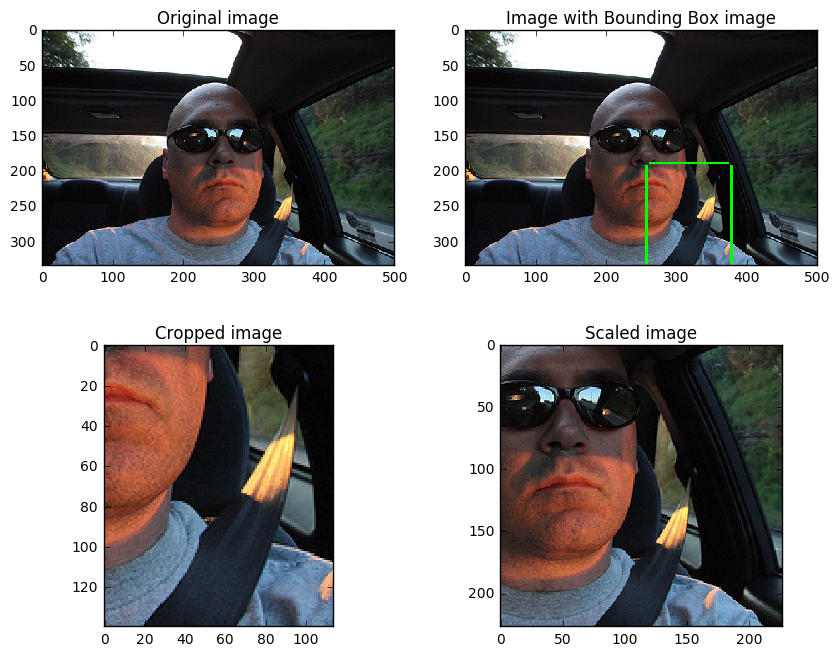

In [27]:

image,xmin,ymin,xmax,ymax,category,class_num,folder_name,filename = Imagenet.imageselect()
plt.subplot(2,2,1)
plt.imshow(image.astype('uint8'))
plt.title('Original image')

print('class_num = ', class_num)
print('folder_name = ', folder_name)
print('filename = ', filename)

bbox_image = Imagenet.BoundingBox(image,xmin,ymin,xmax,ymax)
cropped_image,rows,columns = Imagenet.CroppedImage(image,xmin,ymin,xmax,ymax)
scaled_image = Imagenet.ScaleImage226(image,xmin,ymin,xmax,ymax,rows,columns)

# Show the original image

plt.subplot(2,2,2)
plt.imshow(bbox_image.astype('uint8'))
plt.title('Image with Bounding Box image')
plt.subplot(2,2,3)
plt.imshow(cropped_image.astype('uint8'))
plt.title('Cropped image')
plt.subplot(2,2,4)
plt.imshow(scaled_image.astype('uint8'))
plt.title('Scaled image')


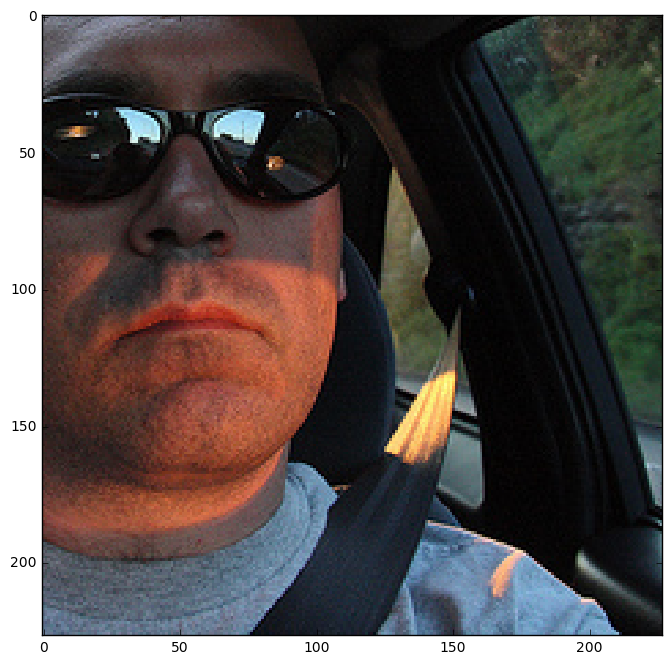

In [28]:
plt.plot
plt.imshow(scaled_image.astype('uint8'))
#plt.savefig('test_image.jpg')
scipy.misc.imsave('input_image.jpg', scaled_image)

In [29]:
from alexnet import AlexNet

image_size = 227

std = 1e-2
model = AlexNet(input_dim=(3,image_size,image_size), hidden_dim=4096, num_classes=1000, weight_scale=std)


print ('Testing initialization ... ')
W1_std = abs(model.params['W1'].std() - std)
print(model.params['W1'].std())
#print('W1_std = ', W1_std)
#print('W1 = ', model.params['W1'])
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std / 10, 'First layer weights do not seem right'
assert np.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(b2 == 0), 'Second layer biases do not seem right'

X = np.ones((1,3,image_size,image_size))
print(X.shape)
print(scaled_image.shape)
X[0] = np.transpose(scaled_image, [2,0,1])


scores = model.loss(X)
print('scores shape = ', scores.shape)

filename, foldername = Imagenet.FileInfo()
print(filename)
print(foldername)

#y = np.asarray([foldername])
y = np.asarray([class_num])
loss, grads = model.loss(X, y)
print('loss = ', loss)


Testing initialization ... 
0.010028805429
(1, 3, 227, 227)
(227, 227, 3)
AlexNet Forward Pass Done
scores shape =  (1, 1000)
n04162706_5904.JPEG
n04162706
AlexNet Forward Pass Done
P =  [[ 0.00105545]
 [ 0.00141304]
 [ 0.00114394]
 [ 0.00119248]
 [ 0.00110635]
 [ 0.00064708]
 [ 0.00103817]
 [ 0.00102819]
 [ 0.00115614]
 [ 0.00094778]
 [ 0.0010278 ]
 [ 0.00084463]
 [ 0.00093735]
 [ 0.00099785]
 [ 0.00105985]
 [ 0.00103283]
 [ 0.00100157]
 [ 0.00115832]
 [ 0.00109239]
 [ 0.00126946]
 [ 0.00083769]
 [ 0.00054091]
 [ 0.00123897]
 [ 0.00088878]
 [ 0.000669  ]
 [ 0.00084688]
 [ 0.00096116]
 [ 0.00108669]
 [ 0.00130788]
 [ 0.00145822]
 [ 0.00087209]
 [ 0.0012541 ]
 [ 0.0010536 ]
 [ 0.00118371]
 [ 0.000964  ]
 [ 0.00122162]
 [ 0.00115748]
 [ 0.00088492]
 [ 0.00102138]
 [ 0.00118453]
 [ 0.00141373]
 [ 0.00064571]
 [ 0.00075192]
 [ 0.00098098]
 [ 0.0011415 ]
 [ 0.00073199]
 [ 0.0012182 ]
 [ 0.00074446]
 [ 0.0008396 ]
 [ 0.0010024 ]
 [ 0.0009976 ]
 [ 0.00080666]
 [ 0.00091092]
 [ 0.00108454]
 [ 

class_num =  467
filename =  ILSVRC2012_val_00000822.JPEG


C:\Users\Marks-M3800\Documents\A_CNN_Model\validation_data.py:257: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  temp_image = refreshed_image[ymin:ymax,xmin:xmax,:]


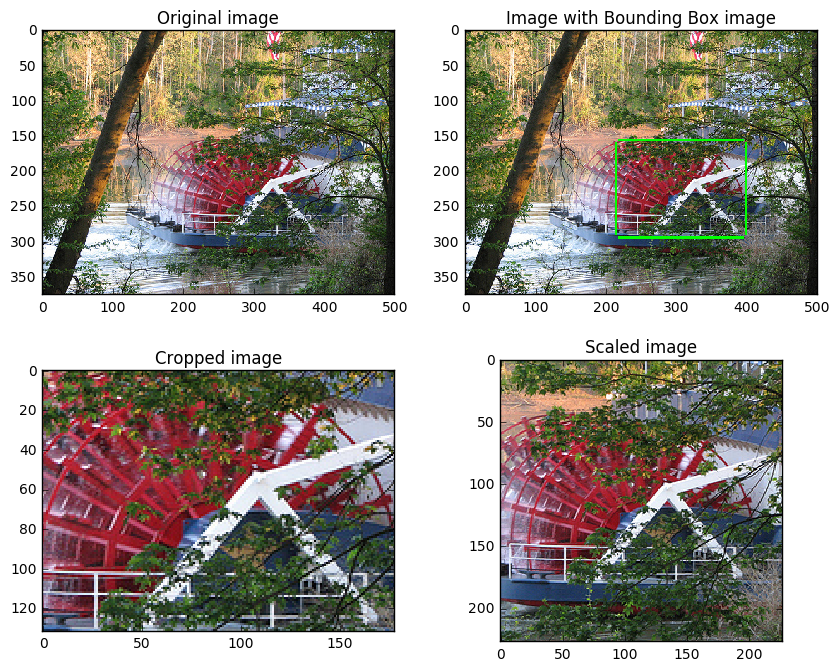

In [32]:
from validation_data import ValidationData

ValData = ValidationData()


image,xmin,ymin,xmax,ymax,category,class_num,filename = ValData.image_select()
plt.subplot(2,2,1)
plt.imshow(image.astype('uint8'))
plt.title('Original image')

print('class_num = ', class_num)
#print('folder_name = ', folder_name)
print('filename = ', filename)

bbox_image = ValData.BoundingBox(image,xmin,ymin,xmax,ymax)
cropped_image,rows,columns = ValData.CroppedImage(image,xmin,ymin,xmax,ymax)
scaled_image = ValData.ScaleImage226(image,xmin,ymin,xmax,ymax,rows,columns)

# Show the original image
plt.subplot(2,2,2)
plt.imshow(bbox_image.astype('uint8'))
plt.title('Image with Bounding Box image')
plt.subplot(2,2,3)
plt.imshow(cropped_image.astype('uint8'))
plt.title('Cropped image')
plt.subplot(2,2,4)
plt.imshow(scaled_image.astype('uint8'))
plt.title('Scaled image')


In [68]:
from TrainNet import TrainNet

Train_Net = TrainNet()

x_train, y_train, y_train_name = Train_Net.get_train_data(num_train=100)
x_val, y_val = Train_Net.get_val_data(num_val=10)

x_train = np.transpose(x_train, [0,3,1,2])
print(x_train.shape)
print(y_train)
print(y_train_name)
x_val = np.transpose(x_val, [0,3,1,2])

class_num =  876
category =  n07615774


C:\Users\Marks-M3800\Documents\A_CNN_Model\validation_data.py:326: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  


class_num =  838
category =  n06596364
class_num =  271
category =  n09256479
class_num =  597
category =  n04346328
class_num =  87
category =  n02408429
class_num =  881
category =  n03680355
class_num =  493
category =  n04162706
class_num =  429
category =  n03544143
class_num =  533
category =  n02177972
class_num =  690
category =  n03710637
(100, 3, 227, 227)
[ 964.  201.  926.  723.   13.  521.  764.   45.  269.  474.  369.  321.
  645.  106.  399.  387.  803.  718.  223.  811.  878.  455.   59.  319.
  698.  511.  715.  870.  963.  255.  260.  780.  418.  514.  690.  540.
  153.  898.  508.  790.  280.  245.   99.  924.  251.  842.   92.  274.
  715.   27.  126.  745.  282.  635.  927.  116.  753.  837.  483.  336.
  275.  602.  510.  157.  598.  877.  263.  351.  598.  198.  471.  790.
  208.  707.  678.  832.  253.  734.  594.  806.  990.  208.  806.  240.
  275.  651.  181.  156.  685.  946.  104.  764.  414.  163.  677.  107.
  428.  361.    5.  144.]
[b'n02097658' b'n0386

In [70]:
from alexnet import AlexNet

image_size = 227

std = 1e-2
model = AlexNet()

#x_train = np.transpose(x_train, [0,3,1,2])
#print(x_train.shape)
#x_val = np.transpose(x_val, [0,3,1,2])

num_train = 200
small_data = {
  'X_train': x_train,
  'y_train': y_train,
  'X_val': x_val,
  'y_val': y_val,
}

solver = Solver(model, small_data,
                num_epochs=10, batch_size=10,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-2,
                },
                verbose=True, print_every=1)
solver.train()



SOLVER train
num_train =  100
iterations_per_epoch =  10.0
num_iterations =  100.0
Iteration :  0
SOLVER _step
num_train =  100
batch_mask =  [91 20 78 43 80 72 17 25 60 32]
AlexNet Forward Pass Done


C:\Users\Marks-M3800\Documents\A_CNN_Model\alexnet.py:158: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Py[i] = P[y[i],i]


loss =  6.90775527938
Backprop Affine3
Backprop Affine2
Backprop Affine1


C:\Users\Marks-M3800\Documents\A_CNN_Model\alexnet.py:183: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dscores[y[i],i]  = dscores[y[i],i] - 1.0


Backprop MaxPool3
Backprop Relu5
Backprop Conv5
Backprop Relu4
Backprop Conv4
Backprop Relu3
Backprop Conv3
Backprop MaxPool2
Backprop Relu2
Backprop Conv2
Backprop MaxPool1
Backprop Relu1
Backprop Conv1
AlexNet Backward Pass Done
loss =  6.90775527938
(Iteration 1 / 100) loss: 6.907755
TRAIN_ACC
SOLVER check_accuracy
AlexNet Forward Pass Done
VAL_ACC
SOLVER check_accuracy
AlexNet Forward Pass Done
(Epoch 0 / 10) train acc: 0.000000; val_acc: 0.000000
Iteration :  1
SOLVER _step
num_train =  100
batch_mask =  [44 70 57 29 91 16 27 16  5 72]
AlexNet Forward Pass Done
loss =  7.05175921563
Backprop Affine3
Backprop Affine2
Backprop Affine1
Backprop MaxPool3
Backprop Relu5
Backprop Conv5
Backprop Relu4
Backprop Conv4
Backprop Relu3
Backprop Conv3
Backprop MaxPool2
Backprop Relu2
Backprop Conv2
Backprop MaxPool1
Backprop Relu1
Backprop Conv1
AlexNet Backward Pass Done
loss =  7.05175921563
(Iteration 2 / 100) loss: 7.051759
Iteration :  2
SOLVER _step
num_train =  100
batch_mask =  [68 66 

C:\Users\Marks-M3800\Documents\A_CNN_Model\alexnet.py:141: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(softmax_input_trans)
C:\Users\Marks-M3800\Documents\A_CNN_Model\alexnet.py:151: RuntimeWarning: invalid value encountered in true_divide
  P[:,i] = exp_scores[:,i] / sum_exp_scores[i]
C:\Users\Marks-M3800\Documents\A_CNN_Model\alexnet.py:161: RuntimeWarning: divide by zero encountered in log
  data_loss = -1*np.log(Py)


loss =  inf
Backprop Affine3
Backprop Affine2
Backprop Affine1
Backprop MaxPool3
Backprop Relu5
Backprop Conv5
Backprop Relu4
Backprop Conv4
Backprop Relu3
Backprop Conv3
Backprop MaxPool2
Backprop Relu2
Backprop Conv2
Backprop MaxPool1
Backprop Relu1
Backprop Conv1
AlexNet Backward Pass Done
loss =  inf
(Iteration 7 / 100) loss: inf
Iteration :  7
SOLVER _step
num_train =  100
batch_mask =  [88 57 10 78 30  4 53 33 40 67]


C:/Users/Marks-M3800/Documents/A2/assignment2\cs231n\layers.py:134: RuntimeWarning: invalid value encountered in less_equal
  out[out <= 0] = 0


AlexNet Forward Pass Done
loss =  nan
Backprop Affine3
Backprop Affine2
Backprop Affine1
Backprop MaxPool3
Backprop Relu5
Backprop Conv5
Backprop Relu4
Backprop Conv4
Backprop Relu3
Backprop Conv3
Backprop MaxPool2
Backprop Relu2
Backprop Conv2
Backprop MaxPool1
Backprop Relu1
Backprop Conv1
AlexNet Backward Pass Done
loss =  nan
(Iteration 8 / 100) loss: nan
Iteration :  8
SOLVER _step
num_train =  100
batch_mask =  [56 68  7 10  8 66 55 42 69  4]
AlexNet Forward Pass Done
loss =  nan
Backprop Affine3
Backprop Affine2
Backprop Affine1
Backprop MaxPool3
Backprop Relu5
Backprop Conv5
Backprop Relu4
Backprop Conv4
Backprop Relu3
Backprop Conv3
Backprop MaxPool2
Backprop Relu2
Backprop Conv2
Backprop MaxPool1
Backprop Relu1
Backprop Conv1
AlexNet Backward Pass Done
loss =  nan
(Iteration 9 / 100) loss: nan
Iteration :  9
SOLVER _step
num_train =  100
batch_mask =  [20 21 73 84 68 94 79 26 38 19]
AlexNet Forward Pass Done
loss =  nan
Backprop Affine3
Backprop Affine2
Backprop Affine1
Backp

KeyboardInterrupt: 

In [17]:
print(y_train.shape)
print(y_val.shape)
print(np.random.choice(num_train, 50))

(200,)
(10, 1)
[166  87 182 198 176   8  12  63  76 107   6  68 192 139  19  54  91 113
 102 144  92  73  81 125 181  52  52 151 150 143 146  93 121  11  64  28
 147 113  83 122   5  61 163  20 113 169  89 190  29 156]


In [ ]:
np.load('bvlc_alexnet.npy')



KeyboardInterrupt
